In [2]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import joblib

# Load dataset
dataset = pd.read_excel(r"C:\Users\wwwad\IOT Project\garden_crops_environment_with_units.xlsx")


In [3]:
# Cell 2: Data Statistical Analysis
# Display basic info
print(dataset.info())

# Statistical summary of environmental parameters
print(dataset[['Temperature (°C)', 'Humidity (%)', 'Soil Moisture (%)', 'pH', 'Light Intensity (Lux)']].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62500 entries, 0 to 62499
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Temperature (°C)       62500 non-null  float64
 1   Humidity (%)           62500 non-null  float64
 2   Soil Moisture (%)      62500 non-null  float64
 3   pH                     62500 non-null  float64
 4   Light Intensity (Lux)  62500 non-null  float64
 5   Crop Name              62500 non-null  object 
dtypes: float64(5), object(1)
memory usage: 2.9+ MB
None
       Temperature (°C)  Humidity (%)  Soil Moisture (%)            pH  \
count      62500.000000  62500.000000       62500.000000  62500.000000   
mean          21.752000     54.275568          50.855094      6.507766   
std            5.108243     12.618585          12.564909      0.510301   
min            4.000000     20.000000          21.010000      4.500000   
25%           18.920000     45.370000          42

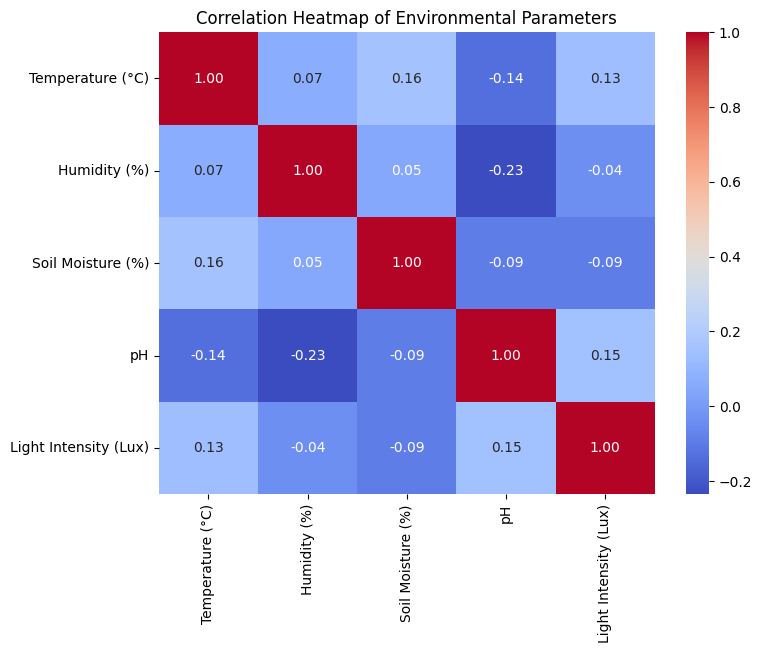

In [4]:
# Cell 3: Heatmap of Environmental Parameters
corr_matrix = dataset[['Temperature (°C)', 'Humidity (%)', 'Soil Moisture (%)', 'pH', 'Light Intensity (Lux)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Environmental Parameters')
plt.show()


In [5]:
# Cell 4: Train, Validation, and Test Split
# Features and target
X = dataset[['Temperature (°C)', 'Humidity (%)', 'Soil Moisture (%)', 'pH', 'Light Intensity (Lux)']]
y = dataset['Crop Name']

# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# Split the data into train (64%), validation (16%), and test (20%)
x_train, x_temp, y_train, y_temp = train_test_split(x_scaled, y, test_size=0.36, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.55, random_state=42)

print(f"Train set: {x_train.shape}, Validation set: {x_valid.shape}, Test set: {x_test.shape}")


Train set: (40000, 5), Validation set: (10124, 5), Test set: (12376, 5)


In [7]:
# Cell 5: Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(x_train, y_train)

log_train_acc = log_model.score(x_train, y_train)
log_valid_acc = log_model.score(x_valid, y_valid)
log_test_acc = log_model.score(x_test, y_test)
log_cv_acc = cross_val_score(log_model, x_train, y_train, cv=5).mean()

print(f"Logistic Regression - Train: {log_train_acc*100:.2f}%, Valid: {log_valid_acc*100:.2f}%, Test: {log_test_acc*100:.2f}%")
print(log_cv_acc*100)


Logistic Regression - Train: 66.31%, Valid: 66.23%, Test: 67.00%
66.27000000000001


In [8]:
# Cell 6: Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

dt_train_acc = dt_model.score(x_train, y_train)
dt_valid_acc = dt_model.score(x_valid, y_valid)
dt_test_acc = dt_model.score(x_test, y_test)
dt_cv_acc = cross_val_score(dt_model, x_train, y_train, cv=5).mean()

print(f"Decision Tree - Train: {dt_train_acc*100:.2f}%, Valid: {dt_valid_acc*100:.2f}%, Test: {dt_test_acc*100:.2f}%")
print(dt_cv_acc*100)

Decision Tree - Train: 100.00%, Valid: 77.16%, Test: 77.67%
77.375


In [9]:
# Cell 7: Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

nb_train_acc = nb_model.score(x_train, y_train)
nb_valid_acc = nb_model.score(x_valid, y_valid)
nb_test_acc = nb_model.score(x_test, y_test)
nb_cv_acc = cross_val_score(nb_model, x_train, y_train, cv=5).mean()

print(f"Naive Bayes - Train: {nb_train_acc*100:.2f}%, Valid: {nb_valid_acc*100:.2f}%, Test: {nb_test_acc*100:.2f}%")
print(nb_cv_acc*100)


Naive Bayes - Train: 76.28%, Valid: 76.30%, Test: 76.97%
76.1575


In [10]:
# Cell 8: Train Random Forest with GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

best_rf_model = grid_search.best_estimator_
best_rf_model.fit(x_train, y_train)

rf_train_acc = best_rf_model.score(x_train, y_train)
rf_valid_acc = best_rf_model.score(x_valid, y_valid)
rf_test_acc = best_rf_model.score(x_test, y_test)
rf_cv_acc = cross_val_score(best_rf_model, x_train, y_train, cv=5).mean()

print(f"Random Forest - Train: {rf_train_acc*100:.2f}%, Valid: {rf_valid_acc*100:.2f}%, Test: {rf_test_acc*100:.2f}%")
print(rf_cv_acc*100)

Random Forest - Train: 90.66%, Valid: 81.37%, Test: 82.50%
82.03250000000001


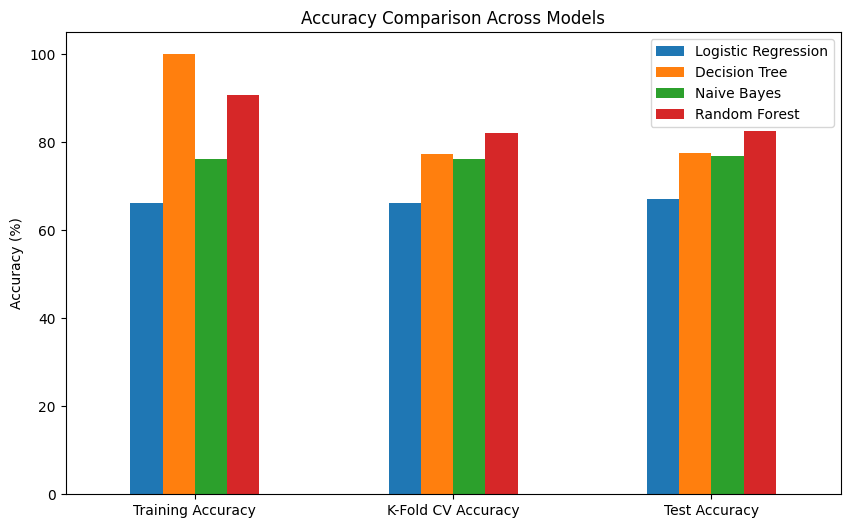

In [11]:
# Cell 9: Accuracy Comparison Bar Chart
import matplotlib.pyplot as plt

# Create a DataFrame for accuracy comparison
results = {
    'Logistic Regression': [log_train_acc*100, log_cv_acc*100, log_test_acc*100],
    'Decision Tree': [dt_train_acc*100, dt_cv_acc*100, dt_test_acc*100],
    'Naive Bayes': [nb_train_acc*100, nb_cv_acc*100, nb_test_acc*100],
    'Random Forest': [rf_train_acc*100, rf_cv_acc*100, rf_test_acc*100]
}

df_results = pd.DataFrame(results, index=['Training Accuracy', 'K-Fold CV Accuracy', 'Test Accuracy'])

# Plotting the bar chart
df_results.plot(kind='bar', figsize=(10, 6))
plt.title('Accuracy Comparison Across Models')
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=0)
plt.show()


In [16]:
# Cell 10: Get unique crop names from the dataset
unique_crops = y.unique()  # Get all unique crop names
print(f"Unique crop names: {unique_crops}")


Unique crop names: ['Rose' 'Daisy' 'Jasmine' 'Sunflower' 'Tomato' 'Lemon' 'Lavender' 'Basil'
 'Mint' 'Coriander' 'Thyme' 'Orchid' 'Petunia' 'Chrysanthemum' 'Tulip'
 'Zinnia' 'Marigold' 'Aloe Vera' 'Fern' 'Peony' 'Hibiscus' 'Begonia'
 'Dahlia' 'Geranium' 'Carnation']


In [18]:
# Cell 11: Updated classification report with correct crop names
from sklearn.metrics import classification_report

# Get unique crop names from the dataset
target_names = y.unique()  # Automatically get the correct crop names

print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_model.predict(x_test), target_names=target_names))




Logistic Regression Classification Report:
               precision    recall  f1-score   support

         Rose       0.48      0.50      0.49       511
        Daisy       0.57      0.62      0.59       491
      Jasmine       0.79      0.82      0.80       503
    Sunflower       0.92      0.98      0.95       523
       Tomato       0.93      0.96      0.95       503
        Lemon       0.25      0.23      0.24       479
     Lavender       0.42      0.35      0.38       486
        Basil       0.51      0.56      0.53       490
         Mint       0.94      0.90      0.92       482
    Coriander       0.46      0.44      0.45       491
        Thyme       0.44      0.51      0.47       466
       Orchid       0.79      0.76      0.77       537
      Petunia       0.93      0.93      0.93       471
Chrysanthemum       0.56      0.57      0.56       506
        Tulip       0.63      0.73      0.67       521
       Zinnia       0.91      0.94      0.92       492
     Marigold       0

In [19]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_model.predict(x_test), target_names=target_names))

Decision Tree Classification Report:
               precision    recall  f1-score   support

         Rose       0.61      0.62      0.61       511
        Daisy       0.65      0.64      0.64       491
      Jasmine       0.90      0.89      0.90       503
    Sunflower       0.99      0.98      0.98       523
       Tomato       1.00      1.00      1.00       503
        Lemon       0.60      0.63      0.62       479
     Lavender       0.77      0.76      0.76       486
        Basil       0.60      0.62      0.61       490
         Mint       0.95      0.97      0.96       482
    Coriander       0.59      0.55      0.57       491
        Thyme       0.66      0.71      0.68       466
       Orchid       0.96      0.97      0.97       537
      Petunia       0.95      0.95      0.95       471
Chrysanthemum       0.56      0.58      0.57       506
        Tulip       0.88      0.85      0.87       521
       Zinnia       0.97      0.95      0.96       492
     Marigold       0.50   

In [20]:
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_model.predict(x_test), target_names=target_names))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

         Rose       0.61      0.49      0.54       511
        Daisy       0.69      0.68      0.68       491
      Jasmine       0.83      0.86      0.84       503
    Sunflower       0.96      1.00      0.98       523
       Tomato       0.97      0.96      0.97       503
        Lemon       0.65      0.56      0.60       479
     Lavender       0.68      0.84      0.76       486
        Basil       0.64      0.60      0.62       490
         Mint       0.98      0.92      0.95       482
    Coriander       0.57      0.51      0.54       491
        Thyme       0.66      0.60      0.63       466
       Orchid       0.97      0.97      0.97       537
      Petunia       0.93      0.93      0.93       471
Chrysanthemum       0.68      0.56      0.61       506
        Tulip       0.78      0.95      0.86       521
       Zinnia       0.93      0.99      0.96       492
     Marigold       0.52     

In [21]:
print("Random Forest Classification Report:")
print(classification_report(y_test, best_rf_model.predict(x_test), target_names=target_names))

Random Forest Classification Report:
               precision    recall  f1-score   support

         Rose       0.88      0.56      0.69       511
        Daisy       0.66      0.73      0.69       491
      Jasmine       0.84      0.94      0.89       503
    Sunflower       0.98      1.00      0.99       523
       Tomato       1.00      1.00      1.00       503
        Lemon       0.92      0.55      0.69       479
     Lavender       0.74      0.99      0.85       486
        Basil       0.76      0.66      0.71       490
         Mint       1.00      0.97      0.98       482
    Coriander       0.61      0.63      0.62       491
        Thyme       0.96      0.65      0.77       466
       Orchid       0.99      0.98      0.98       537
      Petunia       0.94      0.96      0.95       471
Chrysanthemum       0.74      0.54      0.62       506
        Tulip       0.88      1.00      0.93       521
       Zinnia       0.97      1.00      0.98       492
     Marigold       0.68   

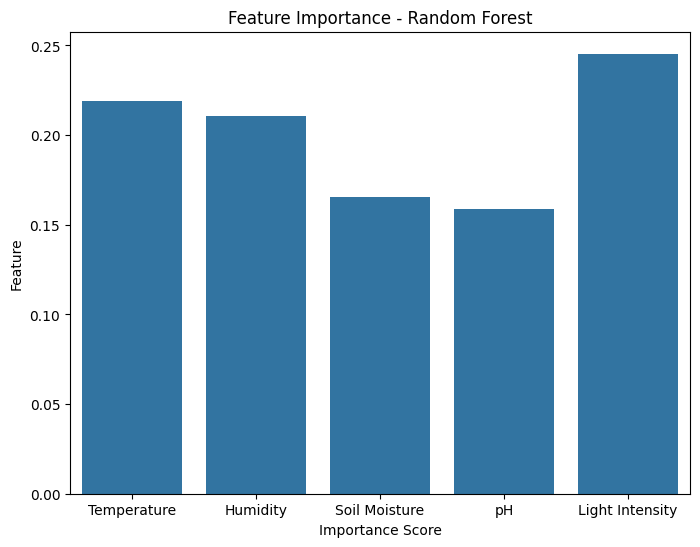

In [23]:
# Cell 11: Feature Importance for Random Forest
importances = best_rf_model.feature_importances_
features = ['Temperature', 'Humidity', 'Soil Moisture', 'pH', 'Light Intensity']

plt.figure(figsize=(8, 6))
sns.barplot(x=features, y=importances)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


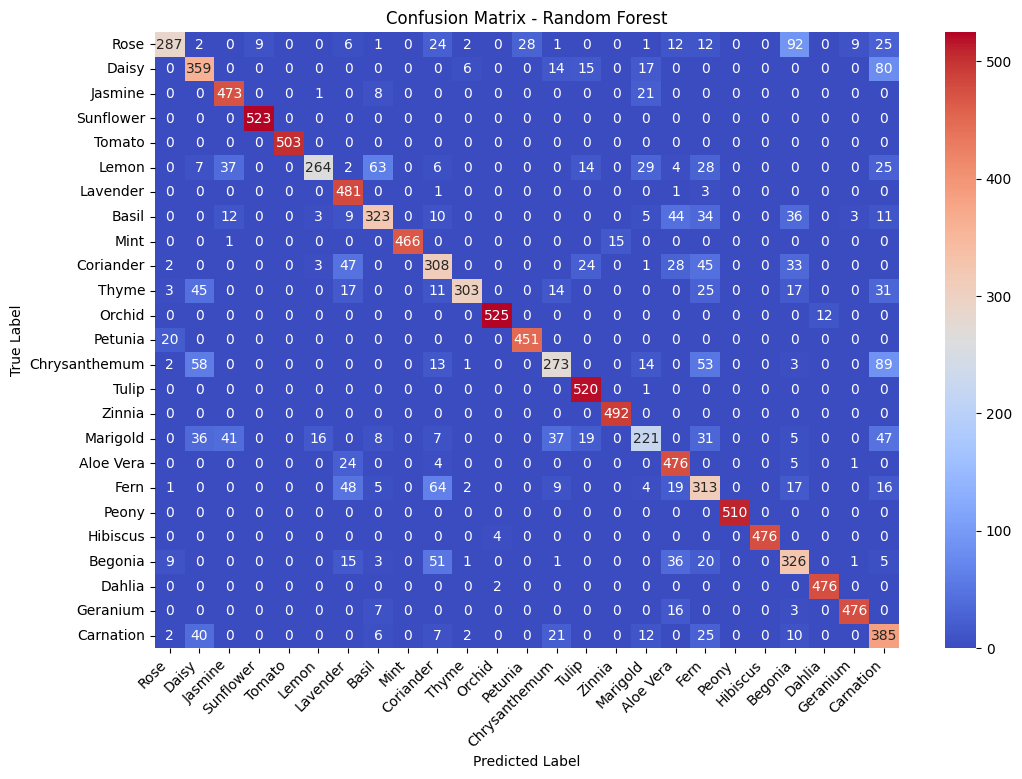

In [25]:
# Cell 12: Improved Confusion Matrix for Random Forest
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, best_rf_model.predict(x_test))

# Set the figure size for better clarity
plt.figure(figsize=(12, 8))

# Use seaborn's heatmap for better visualization
sns.heatmap(cm, annot=True, fmt='g', cmap='coolwarm', xticklabels=target_names, yticklabels=target_names)

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.show()
